 beta_1 = 0.123433


Text(0.5, 0, 'No. of Days from the first Covid19 case in India(2020-01-30 to 2020-05-04)')

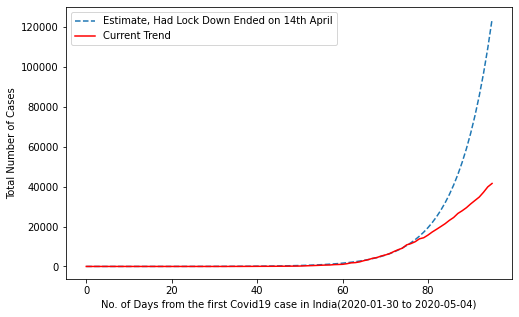

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
df=pd.read_csv('complete.csv')
covid_cases=df.groupby('Date').sum()['Total Confirmed cases']
df_covid_cases=pd.DataFrame(covid_cases)
df_covid_cases['Day']=1
i=0
for value in df_covid_cases.index.values:
    df_covid_cases.loc[value]['Day']=i
    i=i+1

def exponential(x, Beta_1):
     y = np.exp(Beta_1*(x))
     return y
##xdata and ydata should be before lock down
df_beforeLD=df_covid_cases.loc['2020-01-30':'2020-04-14']
xdata=df_beforeLD['Day']
ydata=df_beforeLD['Total Confirmed cases']
popt, pcov = curve_fit(exponential, xdata, ydata)
#print the final parameters
print(" beta_1 = %f" % (popt[0]))
X = np.arange(0,96,1)
#get y values for my X to plot the graph
plt.figure(figsize=(8,5))
y = exponential(X, *popt)
plt.plot(X,y,'--',label='Estimate, Had Lock Down Ended on 14th April')
plt.plot(df_covid_cases['Day'],df_covid_cases['Total Confirmed cases'],'r',label='Current Trend')
plt.legend(loc='best')
plt.ylabel('Total Number of Cases')
plt.xlabel('No. of Days from the first Covid19 case in India(2020-01-30 to 2020-05-04)')

In [3]:
popt

array([0.12343272])